# **Week3 (Classification) 과제**

# Red Wine Quality Classification

## 데이터 소개
  
UCI Machine Learning  
**TASK : Red wine Classification**  
https://archive.ics.uci.edu/dataset/186/wine+quality


csv 파일의 컬럼은 아래와 같습니다.

*   index : 구분자
*   quality : 품질
*   fixed acidity : 산도
*   volatile acidity : 휘발성산
*   citric acid : 시트르산
*   residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분
*   chlorides : 염화물
*   free sulfur dioxide : 독립 이산화황
*   total sulfur dioxide : 총 이산화황
*   density : 밀도
*   pH : 수소이온농도
*   sulphates : 황산염
*   alcohol : 도수
*   type : 종류



In [3]:
# 코랩 환경: 구글 드라이브에 코랩을 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
%matplotlib inline

In [31]:
# loading data ,your own file path
df = pd.read_csv('/content/drive/MyDrive/kubig_data/lab_week3/winequality-red.csv', sep= ';')
# CSV 파일을 읽어오며 제대로 열 구분을 못하여서 ;로 지정해줌.

## EDA(Exploratory Data Analysis)

In [5]:
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Q1 Data brief review : info() 함수를 통해 알아낼 수 있는 정보를 작성하시오.
(**빈칸 ## 4개를 채우시오**)


답: It turns out that the dataset does not have (**Null**) values. The dataset consists of (**1599**) rows and (**12**) columns. The data type of all variables are (**float64**).



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Q2 결측치 확인
결측치가 존재한다면, 이를 처리하는 방법에 대해 알아보고 정리해주세요.

결측치는 판단에 따라 drop(제거) 할 수 있고, 특정 값으로 채울(대체) 수 있습니다.

데이터를 채우는 방법으로는 수치형 데이터는 통계를 이용해서, 범주형 데이터는 unique(), value_counts() 등으로 처리합니다.

In [ ]:
# 결측치 확인

# 결측치가 없으나 이를 처리하는 방법으로는
# 열을 제거하거나, 행을 제거하거나, 평균값을 기입하거나, 열간의 상관관계를 바탕으로 예상하여 기입하는 방법이 있다.

## df의 결측치의 총 합을 확인하는 코드를 작성하며, ##을 채우세요. sum()을 2번 사용하시오.
null_total = df.isnull().sum().sum()

# df.isnull() : 결측치에 대한 boolen 값을 반환
# 첫번째 sum() : 열별로 합함
# 두번째 sum() : 모든 열의 결측치를 합하여 전체 결측치의 수를 구함.

print("There are {} null values in the dataset".format(null_total))

There are 0 null values in the dataset


### Q3 데이터 분포 확인
각 변수의 데이터 분포가 어떠한지 기술하시오.(맨 위의 세개의 변수에 대해서만 기술)

1. 'fixed_acidity' : 왜도값이 0.98로 왼쪽으로 치우쳐짐, 15-16부근에 이상치가 있음.
2. 'volatile_acidity' : 왜도값이 0.67로 fixed_acidity 대비 적게 왼쪽으로 치우쳐짐. 1.4 부근에 이상치가 있음.
3. 'citric_acid' : 왜도값이 0.32로 위 두 변수 대비하여 상대적으로 대칭적으로 분포되어 있음.



In [13]:
# 데이터의 분포를 기술하고자 중심 경향, 왜도를 확인해보자.
for column_name in ['fixed acidity', 'volatile acidity', 'citric acid']:
  col = column_name
  mean = df[col].mean()
  median = df[col].median()
  mode = df[col].mode().iloc[0]
  std = df[col].std()
  skew = df[col].skew()
  print(f"{col} : mean = {mean:.2f}, median = {median:.2f}, mode = {mode} std = {std:.2f}, skew = {skew:.2f}")


fixed acidity : mean = 8.32, median = 7.90, mode = 7.2 std = 1.74, skew = 0.98
volatile acidity : mean = 0.53, median = 0.52, mode = 0.6 std = 0.18, skew = 0.67
citric acid : mean = 0.27, median = 0.26, mode = 0.0 std = 0.19, skew = 0.32


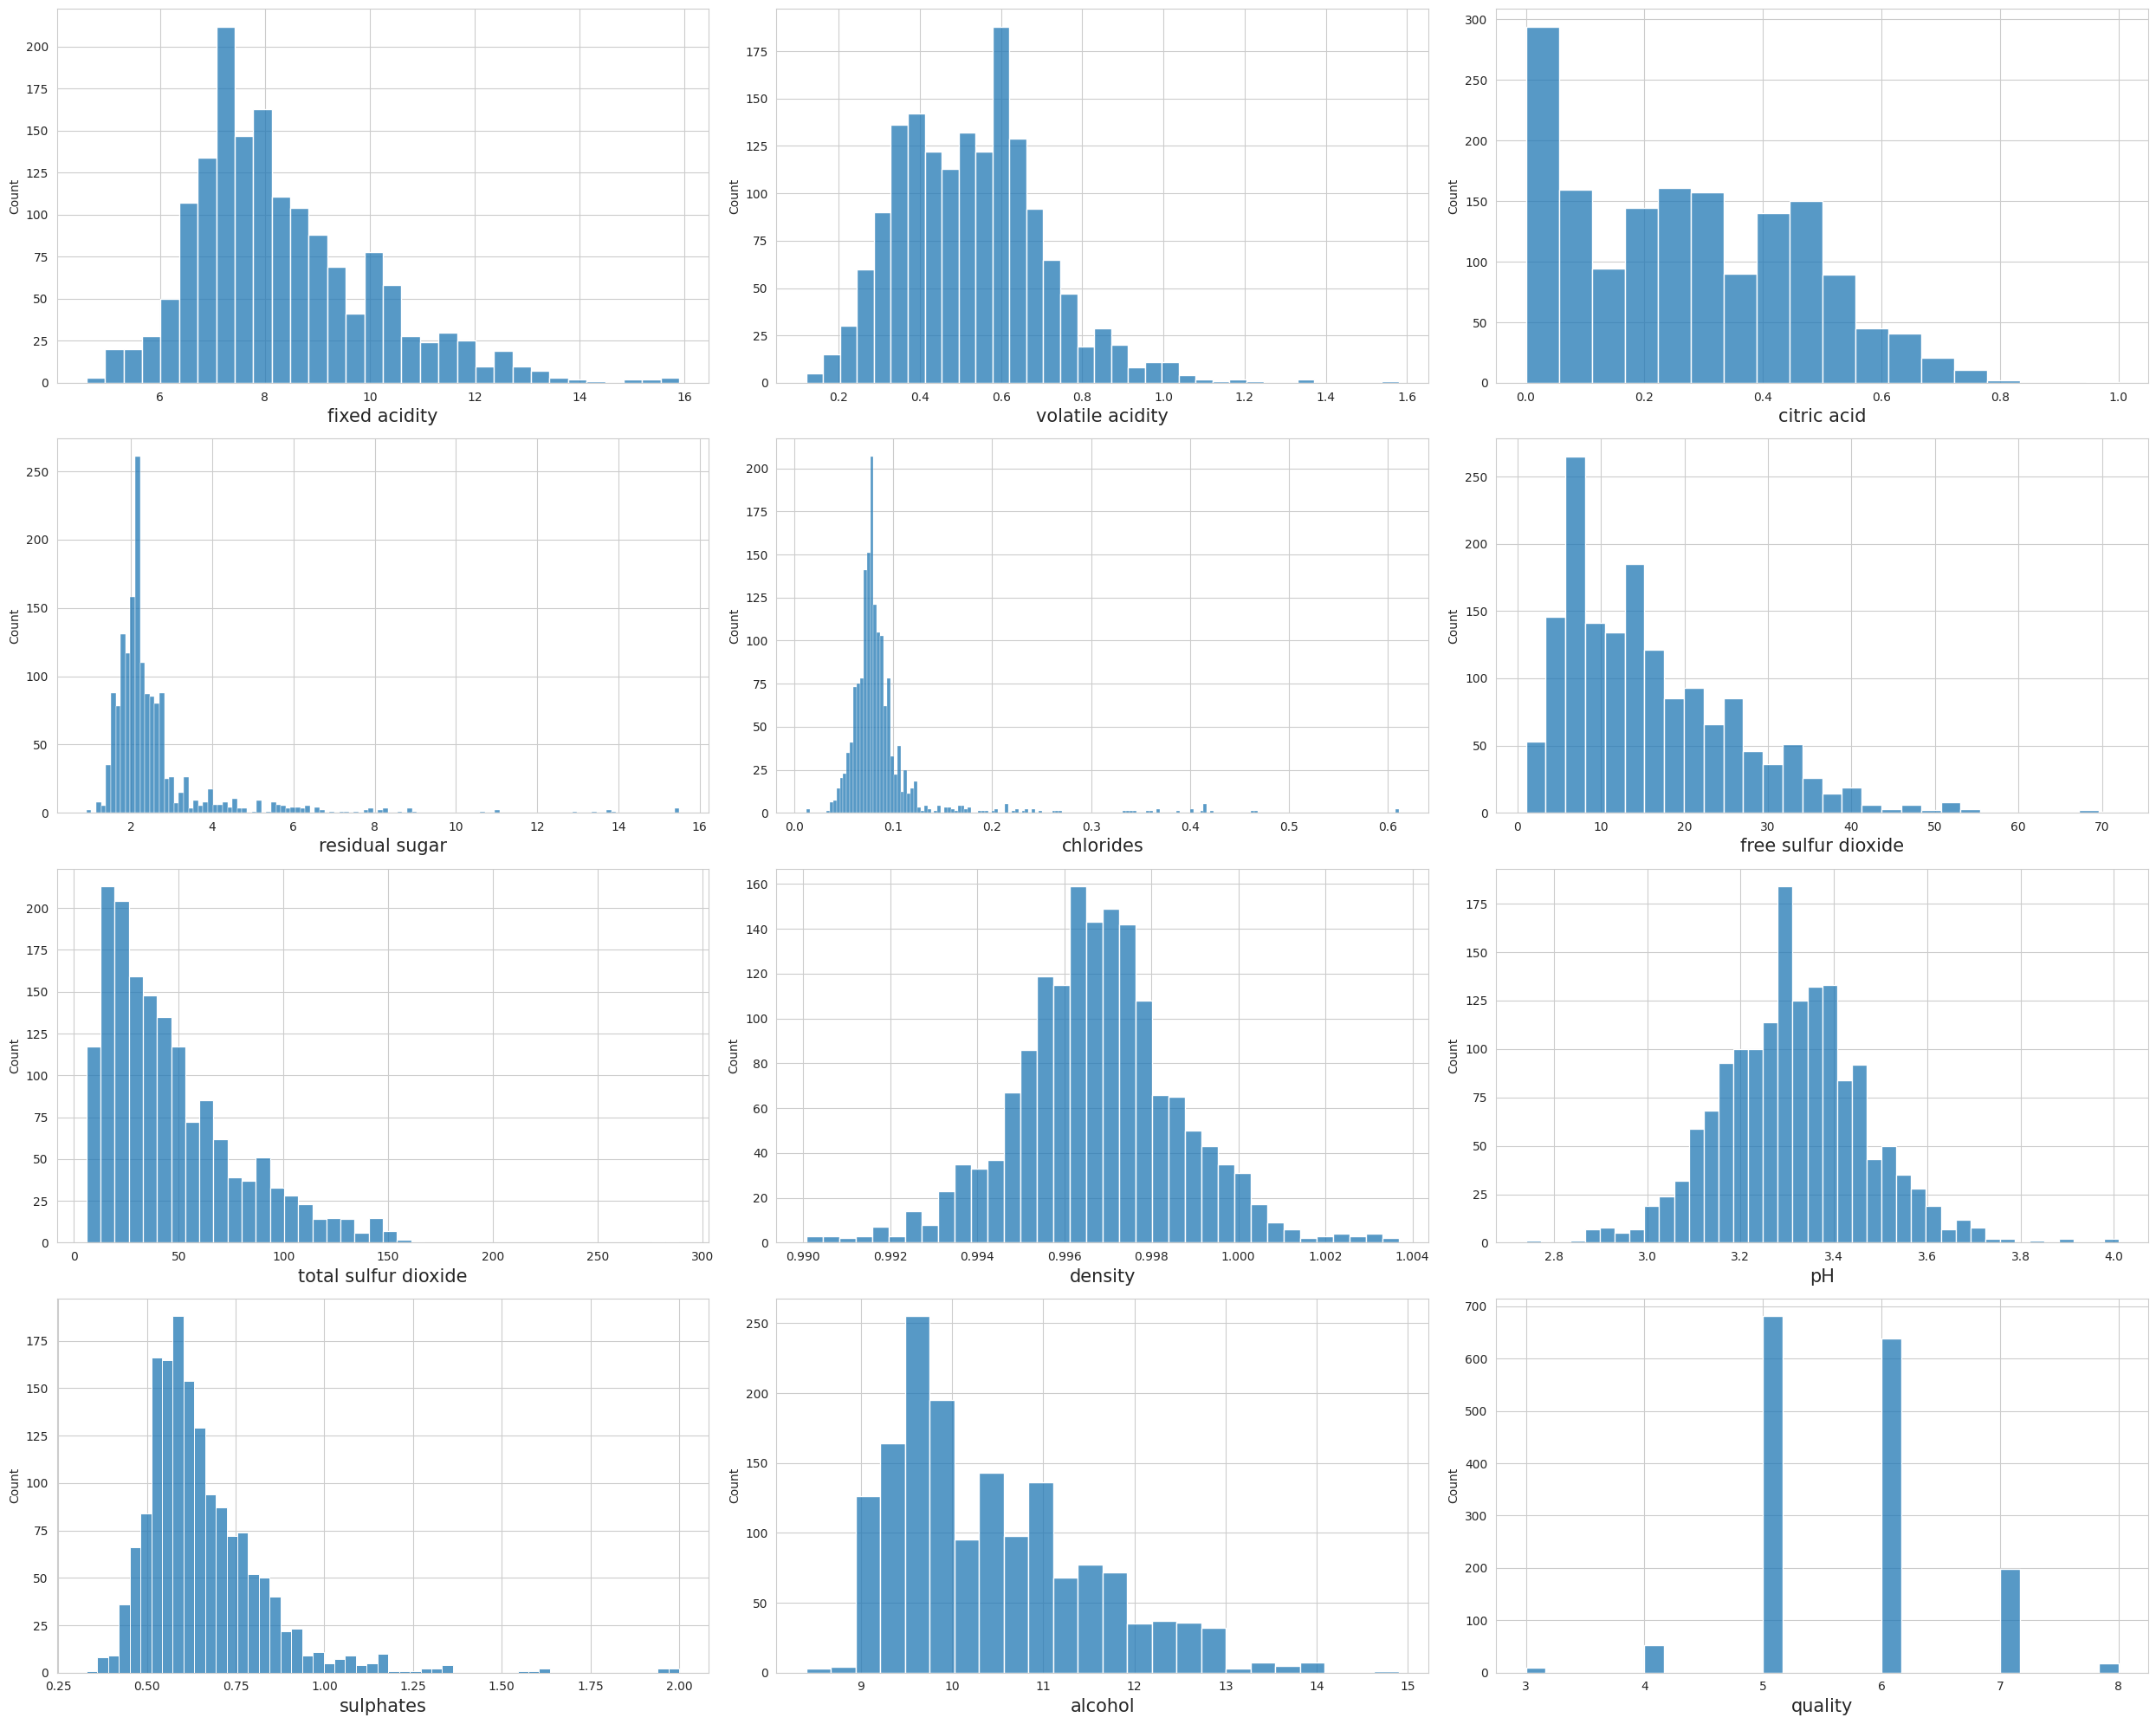

In [ ]:
# let's see how data is distributed for every column
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in df:
    if plotnumber <= 12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.histplot(df[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1

plt.tight_layout()
plt.show()

### Q4. correlation plot을 그리고, 해당 plot에서 얻은 인사이트를 정리해보세요.

더불어 multicollinearity(통계학의 회귀분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제)에 주목하여, 해당 correlation plot에서 어떤 영향을 주고 있는지 예를 들어 기술하시오.

답: fixed acidity와 citric acid, fixed acidity와 density, fixed acidity와 pH,
 volatile acidity와 citric acid,
citric acid와 pH,
free sulfur dioxide과 total sulfur dioxide간에는 상관계수의 절댓값이 모두 0.5가 넘음을 확인할 수 있다. (Alcohol과 Density는 약 4.9로 상관계수가 큰편이다.)
이처럼 독립변수들 간에 강한 상관관계가 존재하며 다중공산성이 있다고 간주할 수 있다. 이는 각 독립변수의 영향이 반영되지 못하여 왜곡된 회귀계수를 얻을 수 있다. 이는 모델의 성능 하락을 야기한다.

특히 fixed acidity와 citric acid는 여러 독립변수들과의 상관계수가 높다. 따라서 이 두가지 변수에 대한 추가적인 대처가 필요할 것 같다.



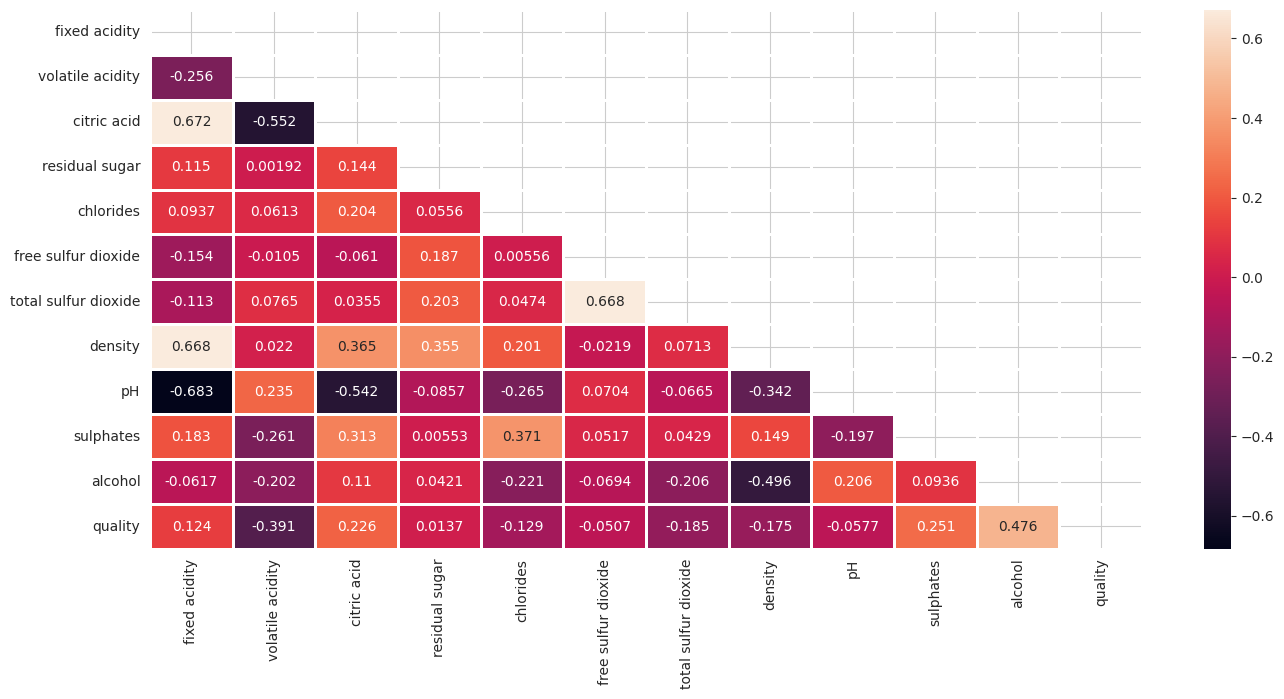

In [22]:
# 상관관계 plot
plt.figure(figsize = (16, 7))

corr = df.corr()
##에 들어갈 코드를 작성하시오.
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, annot = True, fmt = '0.3g', linewidths = 1)
plt.show()

In [21]:
corr_above = corr[abs(corr) >= 0.5]
corr_above

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,NaN,0.671703,NaN,NaN,NaN,NaN,0.668047,-0.682978,NaN,NaN,NaN
volatile acidity,NaN,1.000000,-0.552496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citric acid,0.671703,-0.552496,1.000000,NaN,NaN,NaN,NaN,NaN,-0.541904,NaN,NaN,NaN
residual sugar,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chlorides,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
free sulfur dioxide,NaN,NaN,NaN,NaN,NaN,1.000000,0.667666,NaN,NaN,NaN,NaN,NaN
total sulfur dioxide,NaN,NaN,NaN,NaN,NaN,0.667666,1.000000,NaN,NaN,NaN,NaN,NaN
density,0.668047,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
pH,-0.682978,NaN,-0.541904,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
sulphates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [15]:
#Pearson correlation coefficient
import scipy.stats as st
print("Pearson correlation coefficient:", st.pearsonr(df["alcohol"],df["density"]))
print("Pearson correlation coefficient:", st.pearsonr(df["free sulfur dioxide"],df["total sulfur dioxide"]))
print("Pearson correlation coefficient:", st.pearsonr(df["fixed acidity"],df["pH"]))
print("Pearson correlation coefficient:", st.pearsonr(df["citric acid"],df["pH"]))
print("Pearson correlation coefficient:", st.pearsonr(df["fixed acidity"],df["density"]))

Pearson correlation coefficient: PearsonRResult(statistic=-0.4961797702417016, pvalue=3.9388353399881845e-100)
Pearson correlation coefficient: PearsonRResult(statistic=0.6676664504810215, pvalue=6.40472295468106e-207)
Pearson correlation coefficient: PearsonRResult(statistic=-0.6829781945685314, pvalue=4.063034039843752e-220)
Pearson correlation coefficient: PearsonRResult(statistic=-0.5419041447395097, pvalue=1.007201325911493e-122)
Pearson correlation coefficient: PearsonRResult(statistic=0.6680472921189734, pvalue=3.0747470608605733e-207)


### Q5. quality range를 두 파트로 나눠보세요.
In this dataset quality range is between 3 and 8
We will divide quality range into two parts:



*   High quality wine: 6 - 8
*   Low quality wine: 3 - 5



In [32]:
print(df['quality'])

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64


In [33]:
df["quality"] = df["quality"].apply(lambda x: 1 if x >= 6 else 0)
# df["quality"]이 열에 apply를 적용
# lambda funciton을 이용해서 quality 열의 값이 6보다 크면 1, 그외의 경우에는 0을 반환하도록
##에 들어갈 코드를 작성하시오.
# 원래 써있던 내용상 high가 1, low가 0을 표현하므로 이를 그대로 따라서 작성함.

df["quality"]

,quality
0,0
1,0
2,0
3,1
4,0
...,...
1594,0
1595,1
1596,1
1597,0


In [34]:
df.head().style.background_gradient(cmap = "Reds")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,0
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,0
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,0
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,1
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,0


### Q6. 종속변수(y,label)은 무엇이 되어야 하나요?


In [35]:
# we select dependent variable (label)
y = df["quality"] ##을 채우시오.

# we select independent variable
x = df.drop("quality", axis = 1) ##을 채우시오.

In [36]:
# splitting data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.25,
                                                    shuffle = True,
                                                    random_state = 1)
# Train : test = 0.75 : 0.25

### Q7. 왜 Standardization(StandardScaler, MinMaxScaler 등) 사용할까요?
두 Scaler의 특징에 대해 조사하고, 보다 적절한 Scaler가 무엇일지 그 이유와 함께 적어주세요.

답 : StandardScaler는 평균 0, 표준편차 1이 되도록 만드는 Scaler이다. 이 경우에는 정규분포에 가까운 데이터일수록 Scaler가 잘 작동한다. MinMaxScaler의 경우에는 최대값과 최솟값을 이용해 Scaling 한다. 최대값과 최솟값 사이의 범위로 값들을 재지정한다.
이런 Scaler 별 작동방법은 다음의 식을 통해 확인할 수 있다.
- StandardScaler : z = (x - μ) / σ
- MinMaxScaler : X_scaled = (X - X.min) / (X.max - X.min)

이 경우에 MinMaxScaler는 이상치에 민감하게 반응하게 된다. 이는 앞서 살펴본 fixed acidity, volatile acidity에서 관측한 이상치를 떠올리게 한다.

추가적으로 Free sulfer dioxide, total sulfur dioxide의 경우 std가 다른 피쳐 대비 두자리 숫자로 큰편에 속한다. 이경우 StandardScaler를 사용한다면 상대적으로 모델에 끼치는 영향이 적어질 수 있다. 그러나 앞서 확인한 Quality와의 상관관계에서 그리 높지 않는 값을 가짐을 확인했다. 따라서 std가 큰 값의 영향력이 적어질 것 보다는 std가 상대적으로 작아 모델에 영향을 적게 끼치던 피쳐들 중 상관관계가 큰 피쳐들의 영향을 높이는 이득을 취한다고 생각할 수 있다.
또한 각 피쳐들이 왜도 값이 있어 치우쳐진 모양을 하고는 있으나 어느정도는 정규분포를 따른다고 볼 수 있다고 생각해 StadardScaler를 사용해도 된다고 생각한다.

따라서 이 경우에는 StandardScaler를 사용하는 것이 옳다고 생각한다.



In [44]:
# scaling data
from sklearn.preprocessing import StandardScaler

norm = StandardScaler()
norm.fit(x_train)
x_train = norm.transform(x_train)
x_test = norm.transform(x_test)

### Q7-2. 위의 코드에서, train dataset에 대해서는 fit_transform을, test dataset에 대해서는 transform을 실시하는 이유가 무엇일지 조사해주세요.
답 : fit_transform은 fit과 transform을 모두 진행하는 반면 transform은 데이터 변환만 한다.
모델 학습 과정에서는 훈련 데이터만을 이용해서 모델의 파라미터를 결정해야한다. 반면 테스트 과정에서는 학습 과정에서 알지 못했던 데이터를 이용해야한다.
즉 간단히 말해 테스트 과정의 데이터를 fit하면 안 된다.

따라서 train dataset에만 fit을 실시하여 모델의 파라미터를 학습하고, test dataset에는 transform만을 실시한다.

In [45]:
print(x_train[0:5])
print("\n")
print(x_train.shape)
print("_________________________________________________________________________")
print(x_test[0:5])
print("\n")
print(x_test.shape)

[[-0.56794375 -1.18088385 -0.19241296 -0.17192598 -0.45737585  1.86853316
   0.7479316  -0.45120802  0.73249574 -0.22553894 -0.31915735]
 [-0.00940983  0.80065564 -0.04123135 -0.32236513 -0.0699402  -0.45384715
  -0.08558383  0.44779905 -0.03016065 -0.75844691 -1.15783431]
 [ 2.33643265 -0.84597577  1.67216021  0.05373275 -0.13451281  1.48146978
   0.80967349  1.49315611 -1.36480934  0.42579302  0.05358797]
 [ 0.21400374  1.30301776 -0.24280683 -0.17192598 -0.50042426 -0.64737885
  -0.11645477 -0.23168303 -1.36480934 -0.64002292 -0.97146166]
 [-0.00940983  1.74956187 -1.30107808 -0.24714555 -0.37127904 -1.03444223
  -0.98084114 -0.02261162  0.03339405 -0.46238693  0.51951962]]


(1199, 11)
_________________________________________________________________________
[[ 0.26985713 -0.67852173  1.87373569 -0.24714555  0.12377763 -0.64737885
  -0.11645477  0.97047758  1.43159743  0.01130905  0.05358797]
 [ 0.21400374  0.54947458  0.05955639  0.12895233  0.18835024  0.12674792
   0.71706066  0

In [46]:
print(y_train.head())
print(y_train.shape)
print("___________________________")
print(y_test.head())
print(y_test.shape)

1144    0
73      0
446     0
399     0
647     0
Name: quality, dtype: int64
(1199,)
___________________________
75      0
1283    1
408     1
1281    1
1118    1
Name: quality, dtype: int64
(400,)


### Q8. Building Classification models

이번 코드에서는 non parametric model; knn을 사용하여 train, test 진행해보았습니다.

아래의 코드 외에도 원하는 한가지 classification 모델(KNN 제외)을 선정하여 아래의 과정을 반복하고, 그 결과를 해석하세요. grid search 과정은 거치지 않고 임의의 파라미터값으로 진행해도 좋습니다.

아래와 같은 Kaggle 코드들도 참고해보세요.  
- https://www.kaggle.com/code/melissamonfared/red-wine-quality-prediction-eda-classification/notebook
- https://www.kaggle.com/code/eisgandar/red-wine-quality-eda-classification


In [ ]:
## 아래의 과정을 반복하시오.

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#KNN

knn = KNeighborsClassifier()

knn_params = {"n_neighbors": np.arange(2, 50),
             "weights": ["uniform", "distance"],
             "leaf_size": [25, 30, 25]}

knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [25, 30, 25],
                         'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']})

In [48]:
print("Best score for train set: " + str(knn_cv_model.best_score_))

print("____________________________________________")

print("best K value: " + str(knn_cv_model.best_params_["n_neighbors"]),
     "\nbest weights: " + knn_cv_model.best_params_["weights"],
     "\nbest leaf size: " + str(knn_cv_model.best_params_["leaf_size"]))

Best score for train set: 0.7998529411764705
____________________________________________
best K value: 44 
best weights: distance 
best leaf size: 25


In [49]:
knn_model = KNeighborsClassifier(n_neighbors = knn_cv_model.best_params_["n_neighbors"],
                                leaf_size = knn_cv_model.best_params_["leaf_size"],
                                weights = knn_cv_model.best_params_["weights"])

knn_model.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=25, n_neighbors=44, weights='distance')

In [50]:
from sklearn.metrics import accuracy_score
y_pred = knn_model.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred)) #Validation Set Accurac

Accuracy: 0.7925


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78       188
           1       0.80      0.81      0.81       212

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.79      0.79      0.79       400



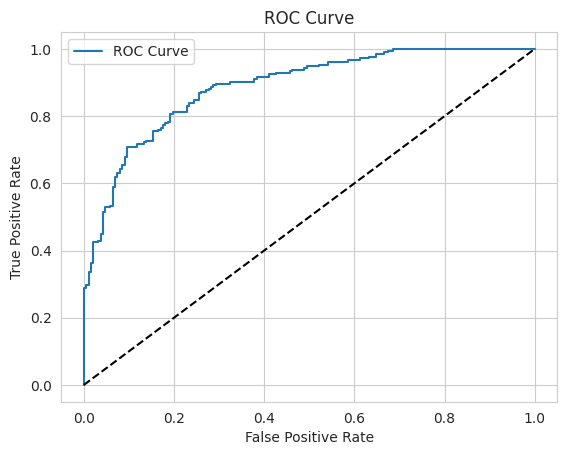

AUC Score: 0.8874197109594539


In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
# Validation Set 에 대한 예측확률 계산
y_prob = knn_model.predict_proba(x_test)[:,1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label = "ROC Curve")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score)

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Gradient Boosting
gbm_model = GradientBoostingClassifier()

gbm_params = {
    "n_estimators": [20, 50, 100],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [1, 3, 5],
    'min_samples_split': [2, 5, 10]
}

gbm_model_cv = GridSearchCV(gbm_model, gbm_params, cv = 10)
gbm_model_cv.fit(x_train, y_train)

print("Best score for train set: " + str(gbm_model_cv.best_score_))
print("____________________________________________")
print("best n_estimators value: " + str(gbm_model_cv.best_params_["n_estimators"]),
     "\nbest learning_rate: " + str(gbm_model_cv.best_params_["learning_rate"]),
     "\nbest max_depth: " + str(gbm_model_cv.best_params_["max_depth"]),
     "\nbest min_samples_split: " + str(gbm_model_cv.best_params_["min_samples_split"]))


Best score for train set: 0.8006792717086835
____________________________________________
best n_estimators value: 50 
best learning_rate: 0.1 
best max_depth: 5 
best min_samples_split: 5


In [55]:
gbm_model = GradientBoostingClassifier(n_estimators = gbm_model_cv.best_params_["n_estimators"],
                                      learning_rate = gbm_model_cv.best_params_["learning_rate"],
                                      max_depth = gbm_model_cv.best_params_["max_depth"],
                                      min_samples_split = gbm_model_cv.best_params_["min_samples_split"])
gbm_model.fit(x_train, y_train)

y_pred = gbm_model.predict(x_test)

Accuracy: 0.805
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       188
           1       0.82      0.81      0.81       212

    accuracy                           0.81       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.81      0.81      0.81       400



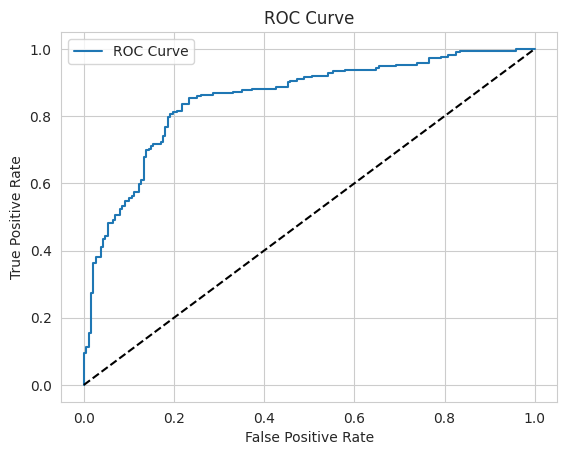

AUC Score: 0.8525692492974709


In [57]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

print("Accuracy:",accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

y_prob = gbm_model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label = "ROC Curve")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# AUC Score
auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score)